In [1]:
!pip install pandas

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.9/bin/python3.9: no such file or directory


In [2]:
import pandas as pd
import os

In [6]:
# 지정된 경로에 있는 파일 리스트

files = os.listdir('../csv/2017')

files

['201702_expense_list.csv',
 '201709_expense_list.csv',
 '201712_expense_list.csv',
 '201706_expense_list.csv',
 '201703_expense_list.csv',
 '201708_expense_list.csv',
 '201707_expense_list.csv',
 '201704_expense_list.csv',
 '201710_expense_list.csv',
 '201701_expense_list.csv',
 '201705_expense_list.csv',
 '201711_expense_list.csv']

In [5]:
# 지정된 폴더에 있는 파일들을 하나의 데이터프레임으로 결합
# 1. 빈 데이터프레임 생성
# 2. 반복문을 이용하여 리스트에 있는 csv 파일들을 하나씩 로드하여
# 3. 빈 데이터프레임에 concat() 사용하여 결합

df_2017 = pd.DataFrame()        # 빈 데이터프레임 생성

for i in files :
    path = '../csv/2017/'
    df = pd.read_csv(path + i)
    df_2017 = pd.concat([df_2017, df], ignore_index = True)

len(df_2017)

70132

In [14]:
# 2021 폴더에서 csv 파일만 출력

files = os.listdir('../csv/2021')

files

['202110_expense_list.xlsx',
 '202110_expense_list.xml',
 '202105_expense_list.json',
 '202104_expense_list.xml',
 '202109_expense_list.xlsx',
 '202107_expense_list.csv',
 '202111_expense_list.xlsx',
 '202103_expense_list.csv',
 '202104_expense_list.json',
 '202108_expense_list.csv',
 '202108_expense_list.xlsx',
 '202101_expense_list.json',
 '202112_expense_list.xlsx',
 '202111_expense_list.xml',
 '202112_expense_list.csv',
 '202107_expense_list.json',
 '202106_expense_list.csv',
 '202105_expense_list.xml',
 '202102_expense_list.json',
 '202101_expense_list.xml',
 '202102_expense_list.csv',
 '202106_expense_list.json',
 '202103_expense_list.json',
 '202109_expense_list.csv',
 '202105_expense_list.csv',
 '202103_expense_list.xlsx',
 '202106_expense_list.xml',
 '202112_expense_list.xml',
 '202111_expense_list.csv',
 '202106_expense_list.xlsx',
 '202109_expense_list.xml',
 '202102_expense_list.xlsx',
 '202102_expense_list.xml',
 '202112_expense_list.json',
 '202101_expense_list.csv',
 '20

In [13]:
files = [file for file in files if file.endswith('.csv')]

files

[]

In [15]:
# 1. 컬럼명 변경 - ['nid', '제목', 'url',
#                '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5',
#                '집행연도', '집행월', '예산', '집행',
#                '구분', '부서명', '집행일시', '집행장소', '집행목적', 대상인원', '결제방법', '집행금액']
# 2. 컬럼 삭제 - ['부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']
# 3. 연도별 집행금액의 합 시각화(bar 그래프)
# 4. pivot_table을 사용하여 그룹화(연도, 월)후 집행금액의 합계를 그래프로 출력(bar 그래프)

In [19]:
df_2017.columns = ['nid', '제목', 'url',
                   '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5',
                   '집행연도', '집행월', '예산', '집행',
                   '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법', '집행금액']

In [24]:
df_2017 = df_2017.drop(columns = ['부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분'])

In [25]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt

In [29]:
month_df = df_2017.groupby('집행월').sum()['집행금액']

month_df

집행월
1      710368860
2      712679864
3      737250454
4      635265805
5      647582378
6      758257342
7      701604626
8      661174850
9      806170700
10     637219943
11     843619171
12    1225747394
Name: 집행금액, dtype: int64

In [33]:
pivot_month = pd.pivot_table(df_2017, index = ['집행월'], columns = ['집행연도'], values = ['집행금액'], aggfunc = 'sum')

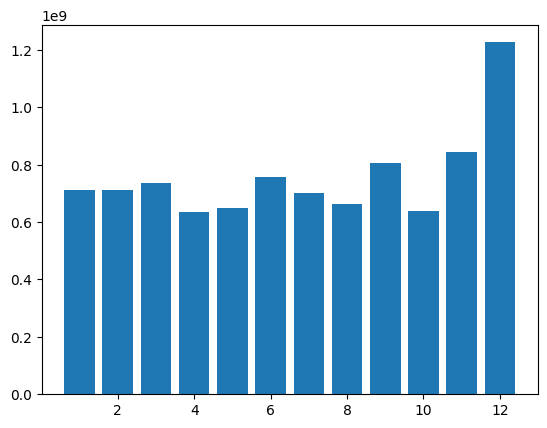

In [34]:
# bar 그래프의 x값: 집행월, y값: 집행금액의 합계

x = month_df.index

plt.bar(x, month_df)
plt.show()

<AxesSubplot:ylabel='집행월'>

/Users/ohyoulooknice/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  func(*args, **kwargs)
/Users/ohyoulooknice/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/Users/ohyoulooknice/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/Users/ohyoulooknice/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/Users/ohyoulooknice/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/ohyoulooknice/Librar

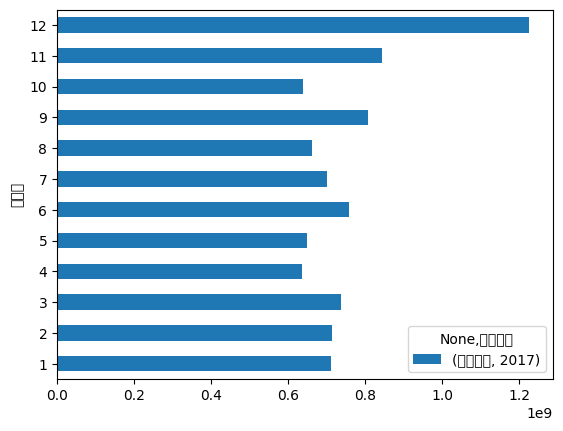

In [36]:
pivot_month.plot.barh()